# Logistic Regression Project Exercise 

**GOAL: Create a Classification Model that can predict whether or not a person has presence of heart disease based on physical features of that person (age,sex, cholesterol, etc...)**

**Complete the TASKs written in bold below.**

## Imports

**TASK: Run the cell below to import the necessary libraries.**

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

## Data

This database contains 14 physical attributes based on physical testing of a patient. Blood samples are taken and the patient also conducts a brief exercise test. The "goal" field refers to the presence of heart disease in the patient. It is integer (0 for no presence, 1 for presence). In general, to confirm 100% if a patient has heart disease can be quite an invasive process, so if we can create a model that accurately predicts the likelihood of heart disease, we can help avoid expensive and invasive procedures.

Content

Attribute Information:

* age
* sex
* chest pain type (4 values)
* resting blood pressure
* serum cholestoral in mg/dl
* fasting blood sugar > 120 mg/dl
* resting electrocardiographic results (values 0,1,2)
* maximum heart rate achieved
* exercise induced angina
* oldpeak = ST depression induced by exercise relative to rest
* the slope of the peak exercise ST segment
* number of major vessels (0-3) colored by flourosopy
* thal: 3 = normal; 6 = fixed defect; 7 = reversable defect
* target:0 for no presence of heart disease, 1 for presence of heart disease

Original Source: https://archive.ics.uci.edu/ml/datasets/Heart+Disease

Creators:

Hungarian Institute of Cardiology. Budapest: Andras Janosi, M.D.
University Hospital, Zurich, Switzerland: William Steinbrunn, M.D.
University Hospital, Basel, Switzerland: Matthias Pfisterer, M.D.
V.A. Medical Center, Long Beach and Cleveland Clinic Foundation: Robert Detrano, M.D., Ph.D.

----

**TASK: Run the cell below to read in the data.**

In [2]:
import os

In [3]:
pwd

'C:\\Users\\asus\\Desktop\\Kids\\Udemy\\05 2022 Python for Machine Learning & Data Science Masterclass\\Kids_Learning\\13_LogisticRegression'

In [4]:
os.getcwd()

'C:\\Users\\asus\\Desktop\\Kids\\Udemy\\05 2022 Python for Machine Learning & Data Science Masterclass\\Kids_Learning\\13_LogisticRegression'

In [5]:
df = pd.read_csv('C:\\Users\\asus\\Desktop\\Kids\\Udemy\\05 2022 Python for Machine Learning & Data Science Masterclass\\Kids_Learning\\DATA\\heart.csv')

In [6]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [8]:
df['target'].unique()

array([1, 0], dtype=int64)

### Exploratory Data Analysis and Visualization

Feel free to explore the data further on your own.

**TASK: Explore if the dataset has any missing data points and create a statistical summary of the numerical features as shown below.**

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [10]:
df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [11]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
age,303.0,54.366337,9.082101,29.0,47.5,55.0,61.0,77.0
sex,303.0,0.683168,0.466011,0.0,0.0,1.0,1.0,1.0
cp,303.0,0.966997,1.032052,0.0,0.0,1.0,2.0,3.0
trestbps,303.0,131.623762,17.538143,94.0,120.0,130.0,140.0,200.0
chol,303.0,246.264026,51.830751,126.0,211.0,240.0,274.5,564.0
fbs,303.0,0.148515,0.356198,0.0,0.0,0.0,0.0,1.0
restecg,303.0,0.528053,0.525860,0.0,0.0,1.0,1.0,2.0
thalach,303.0,149.646865,22.905161,71.0,133.5,153.0,166.0,202.0
exang,303.0,0.326733,0.469794,0.0,0.0,0.0,1.0,1.0
oldpeak,303.0,1.039604,1.161075,0.0,0.0,0.8,1.6,6.2


### Visualization Tasks

**TASK: Create a bar plot that shows the total counts per target value.**

<AxesSubplot:xlabel='target', ylabel='count'>

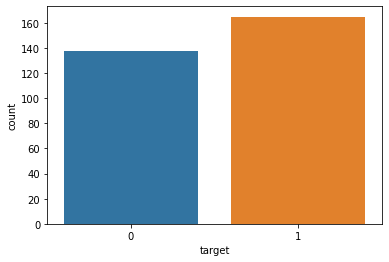

In [12]:
sns.countplot(x='target', data=df)

**TASK: Create a pairplot that displays the relationships between the following columns:**

    ['age','trestbps', 'chol','thalach','target']
   
*Note: Running a pairplot on everything can take a very long time due to the number of features*

In [13]:
df.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

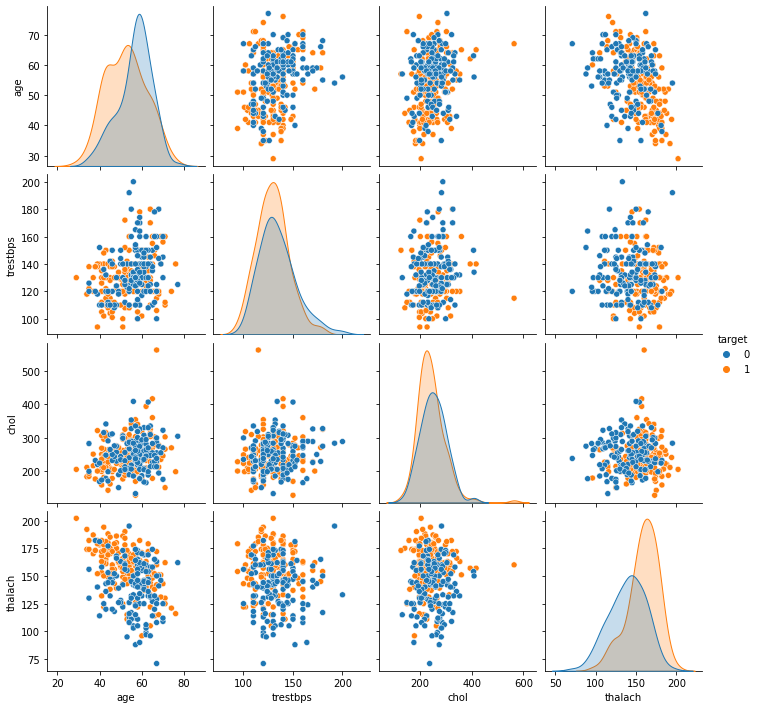

In [14]:
sns.pairplot(df,vars=['age','trestbps', 'chol','thalach'], hue='target')

**TASK: Create a heatmap that displays the correlation between all the columns.**

<AxesSubplot:>

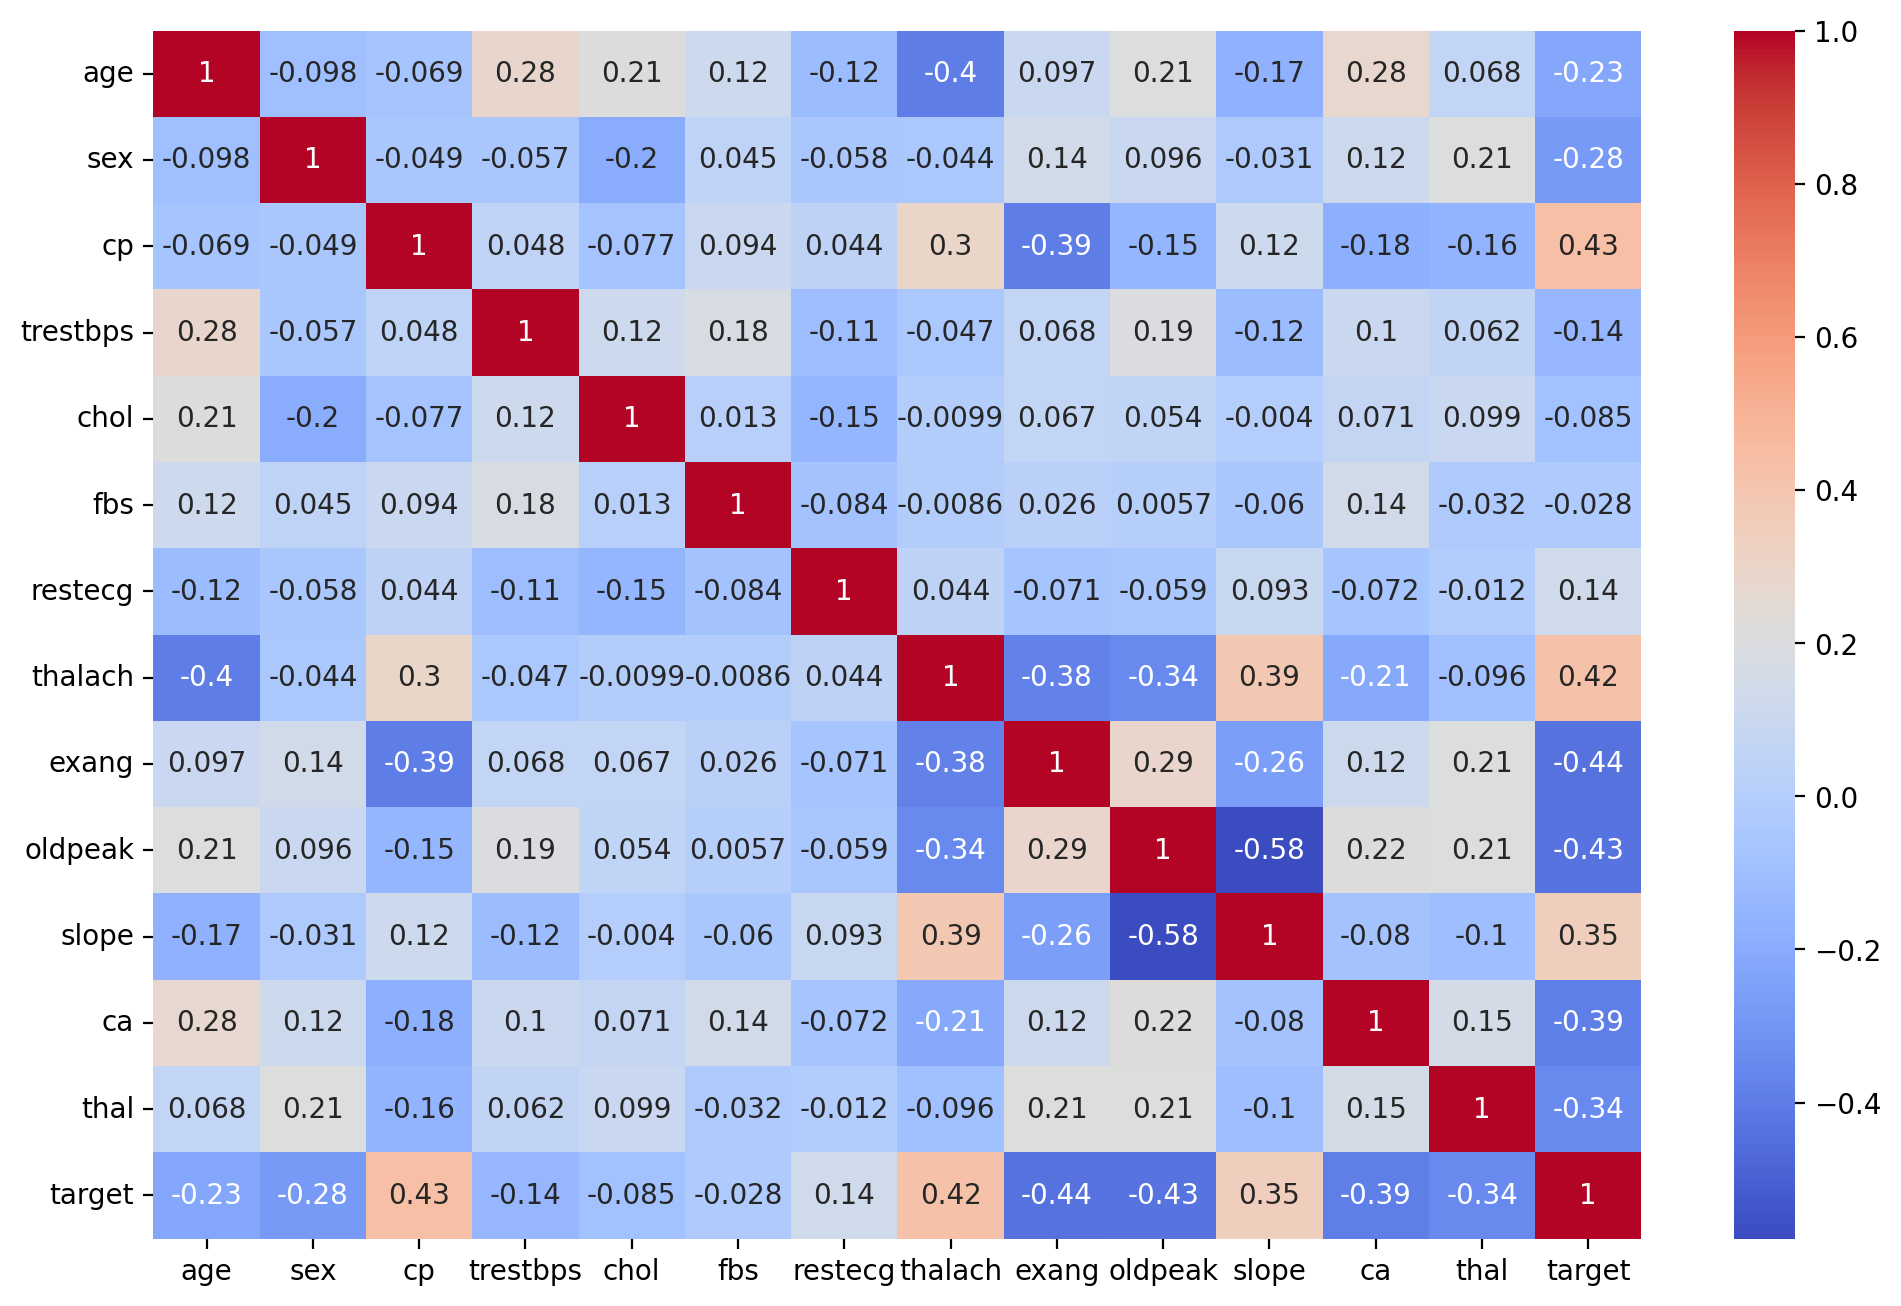

In [15]:
plt.figure(figsize=(12,8), dpi=200)
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')

----
----

# Machine Learning

## Train | Test Split and Scaling

**TASK: Separate the features from the labels into 2 objects, X and y.**

In [16]:
from sklearn.model_selection import train_test_split

In [17]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [18]:
X = df.drop('target', axis=1)

In [19]:
y = df['target']

In [20]:
X.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2


In [21]:
pd.DataFrame(y).head()

,target
0,1
1,1
2,1
3,1
4,1


**TASK: Perform a train test split on the data, with the test size of 10% and a random_state of 101.**

In [22]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=101)

In [23]:
X

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3


In [24]:
X_train

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
13,64,1,3,110,211,0,0,144,1,1.8,1,0,2
176,60,1,0,117,230,1,1,160,1,1.4,2,2,3
171,48,1,1,110,229,0,1,168,0,1.0,0,0,3
128,52,0,2,136,196,0,0,169,0,0.1,1,0,2
119,46,0,0,138,243,0,0,152,1,0.0,1,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
40,51,0,2,140,308,0,0,142,0,1.5,2,1,2
75,55,0,1,135,250,0,0,161,0,1.4,1,0,2
87,46,1,1,101,197,1,1,156,0,0.0,2,0,3
63,41,1,1,135,203,0,1,132,0,0.0,1,0,1


**TASK: Create a StandardScaler object and normalize the X train and test set feature data. Make sure you only fit to the training data to avoid data leakage (data knowledge leaking from the test set).**

In [25]:
from sklearn.preprocessing import StandardScaler

In [26]:
scaler = StandardScaler()

In [27]:
scaler

StandardScaler()

In [28]:
scaled_X_train = scaler.fit_transform(X_train)

In [29]:
scaled_X_test = scaler.fit_transform(X_test)

## Logistic Regression Model

**TASK: Create a Logistic Regression model and use Cross-Validation to find a well-performing C value for the hyper-parameter search. You have two options here, use *LogisticRegressionCV* OR use a combination of *LogisticRegression* and *GridSearchCV*. The choice is up to you.**

In [32]:
from sklearn.linear_model import LogisticRegressionCV
from sklearn.model_selection import GridSearchCV

In [33]:
logit_model = LogisticRegressionCV()

In [34]:
logit_model

LogisticRegressionCV()

**TASK: Report back your search's optimal parameters, specifically the C value.** 

*Note: You may get a different value than what is shown here depending on how you conducted your search.*

In [35]:
logit_model.fit(scaled_X_train,y_train)

LogisticRegressionCV()

In [36]:
# best fit C value
logit_model.C_

array([0.04641589])

In [37]:
# 10 Cs from default=10
logit_model.Cs_

array([1.00000000e-04, 7.74263683e-04, 5.99484250e-03, 4.64158883e-02,
       3.59381366e-01, 2.78255940e+00, 2.15443469e+01, 1.66810054e+02,
       1.29154967e+03, 1.00000000e+04])

In [38]:
# len of Cs
logit_model.Cs

10

In [39]:
# provided parameters
logit_model.get_params()

{'Cs': 10,
 'class_weight': None,
 'cv': None,
 'dual': False,
 'fit_intercept': True,
 'intercept_scaling': 1.0,
 'l1_ratios': None,
 'max_iter': 100,
 'multi_class': 'auto',
 'n_jobs': None,
 'penalty': 'l2',
 'random_state': None,
 'refit': True,
 'scoring': None,
 'solver': 'lbfgs',
 'tol': 0.0001,
 'verbose': 0}

### Coeffecients

**TASK: Report back the model's coefficients.**

In [40]:
logit_model.coef_

array([[-0.09621199, -0.39460154,  0.53534731, -0.13850191, -0.08830462,
         0.02487341,  0.08083826,  0.29914053, -0.33438151, -0.352386  ,
         0.25101033, -0.49735752, -0.37448551]])

**BONUS TASK: We didn't show this in the lecture notebooks, but you have the skills to do this! Create a visualization of the coefficients by using a barplot of their values. Even more bonus points if you can figure out how to sort the plot! If you get stuck on this, feel free to quickly view the solutions notebook for hints, there are many ways to do this, the solutions use a combination of pandas and seaborn.**

In [41]:
logit_model.coef_.shape

(1, 13)

In [42]:
logit_model.coef_[0]

array([-0.09621199, -0.39460154,  0.53534731, -0.13850191, -0.08830462,
        0.02487341,  0.08083826,  0.29914053, -0.33438151, -0.352386  ,
        0.25101033, -0.49735752, -0.37448551])

In [43]:
# test array slicing
logit_model.coef_[0][12]

-0.3744855060527057

In [45]:
coefs = pd.DataFrame(data=logit_model.coef_[0], index=X.columns,columns=['coef_vals']).sort_values(by='coef_vals')

In [46]:
coefs

,coef_vals
ca,-0.497358
sex,-0.394602
thal,-0.374486
oldpeak,-0.352386
exang,-0.334382
trestbps,-0.138502
age,-0.096212
chol,-0.088305
fbs,0.024873
restecg,0.080838


<AxesSubplot:ylabel='coef_vals'>

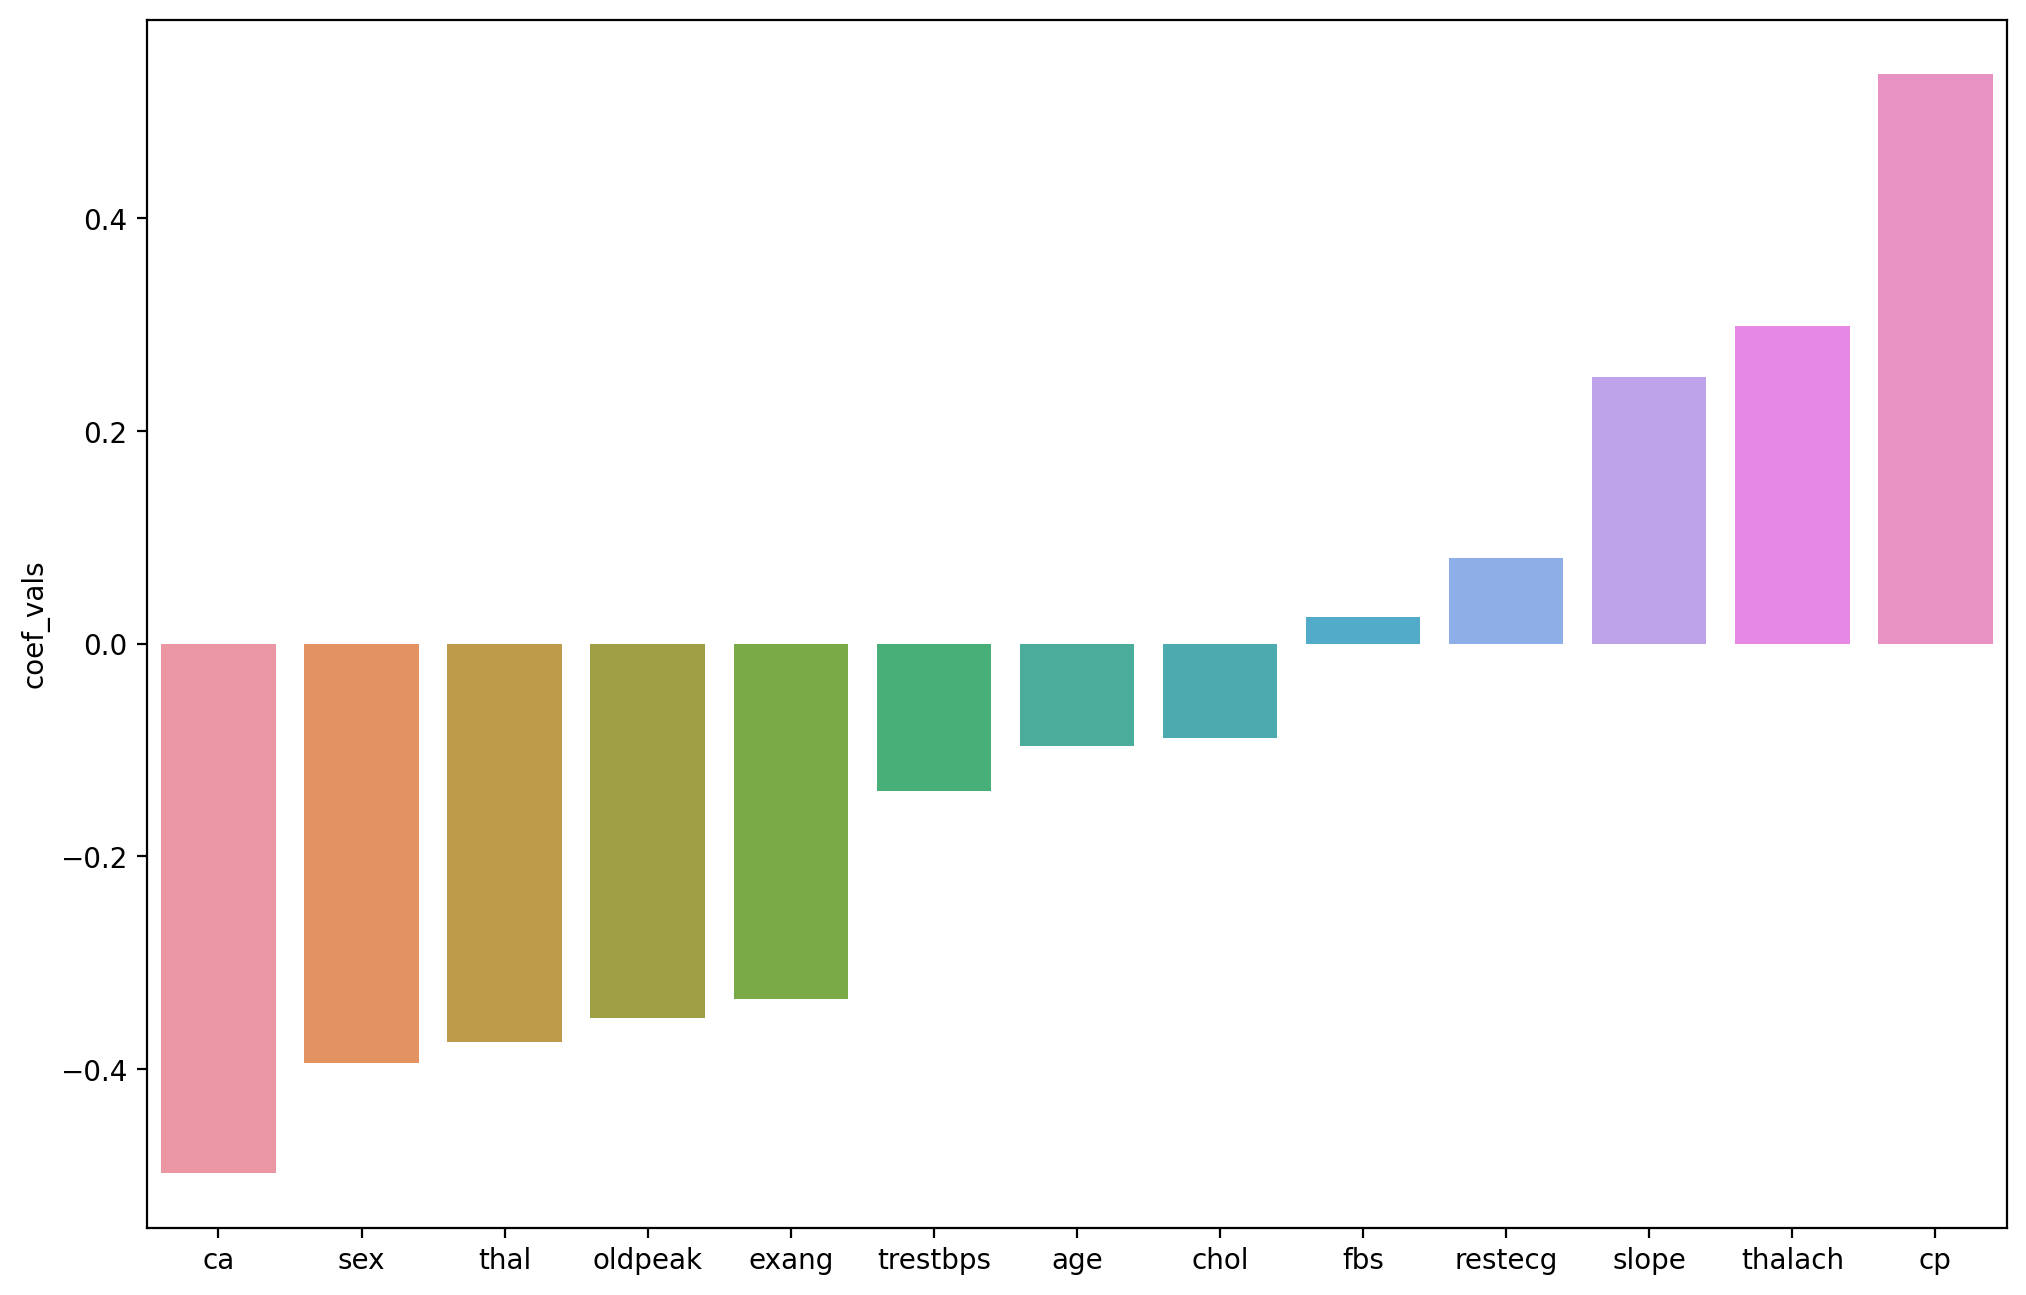

In [47]:
# 1st method
plt.figure(figsize=(12,8), dpi=200)
sns.barplot(x=coefs.index, y='coef_vals',data= coefs)

In [48]:
coefs_2 = pd.Series(data=logit_model.coef_[0], index=X.columns).sort_values()

In [49]:
coefs_2

ca         -0.497358
sex        -0.394602
thal       -0.374486
oldpeak    -0.352386
exang      -0.334382
trestbps   -0.138502
age        -0.096212
chol       -0.088305
fbs         0.024873
restecg     0.080838
slope       0.251010
thalach     0.299141
cp          0.535347
dtype: float64

In [50]:
print(f"index:{coefs_2.index}")
print('\n')
print(f"values: {coefs_2.values}")

index:Index(['ca', 'sex', 'thal', 'oldpeak', 'exang', 'trestbps', 'age', 'chol',
       'fbs', 'restecg', 'slope', 'thalach', 'cp'],
      dtype='object')


values: [-0.49735752 -0.39460154 -0.37448551 -0.352386   -0.33438151 -0.13850191
 -0.09621199 -0.08830462  0.02487341  0.08083826  0.25101033  0.29914053
  0.53534731]


<AxesSubplot:>

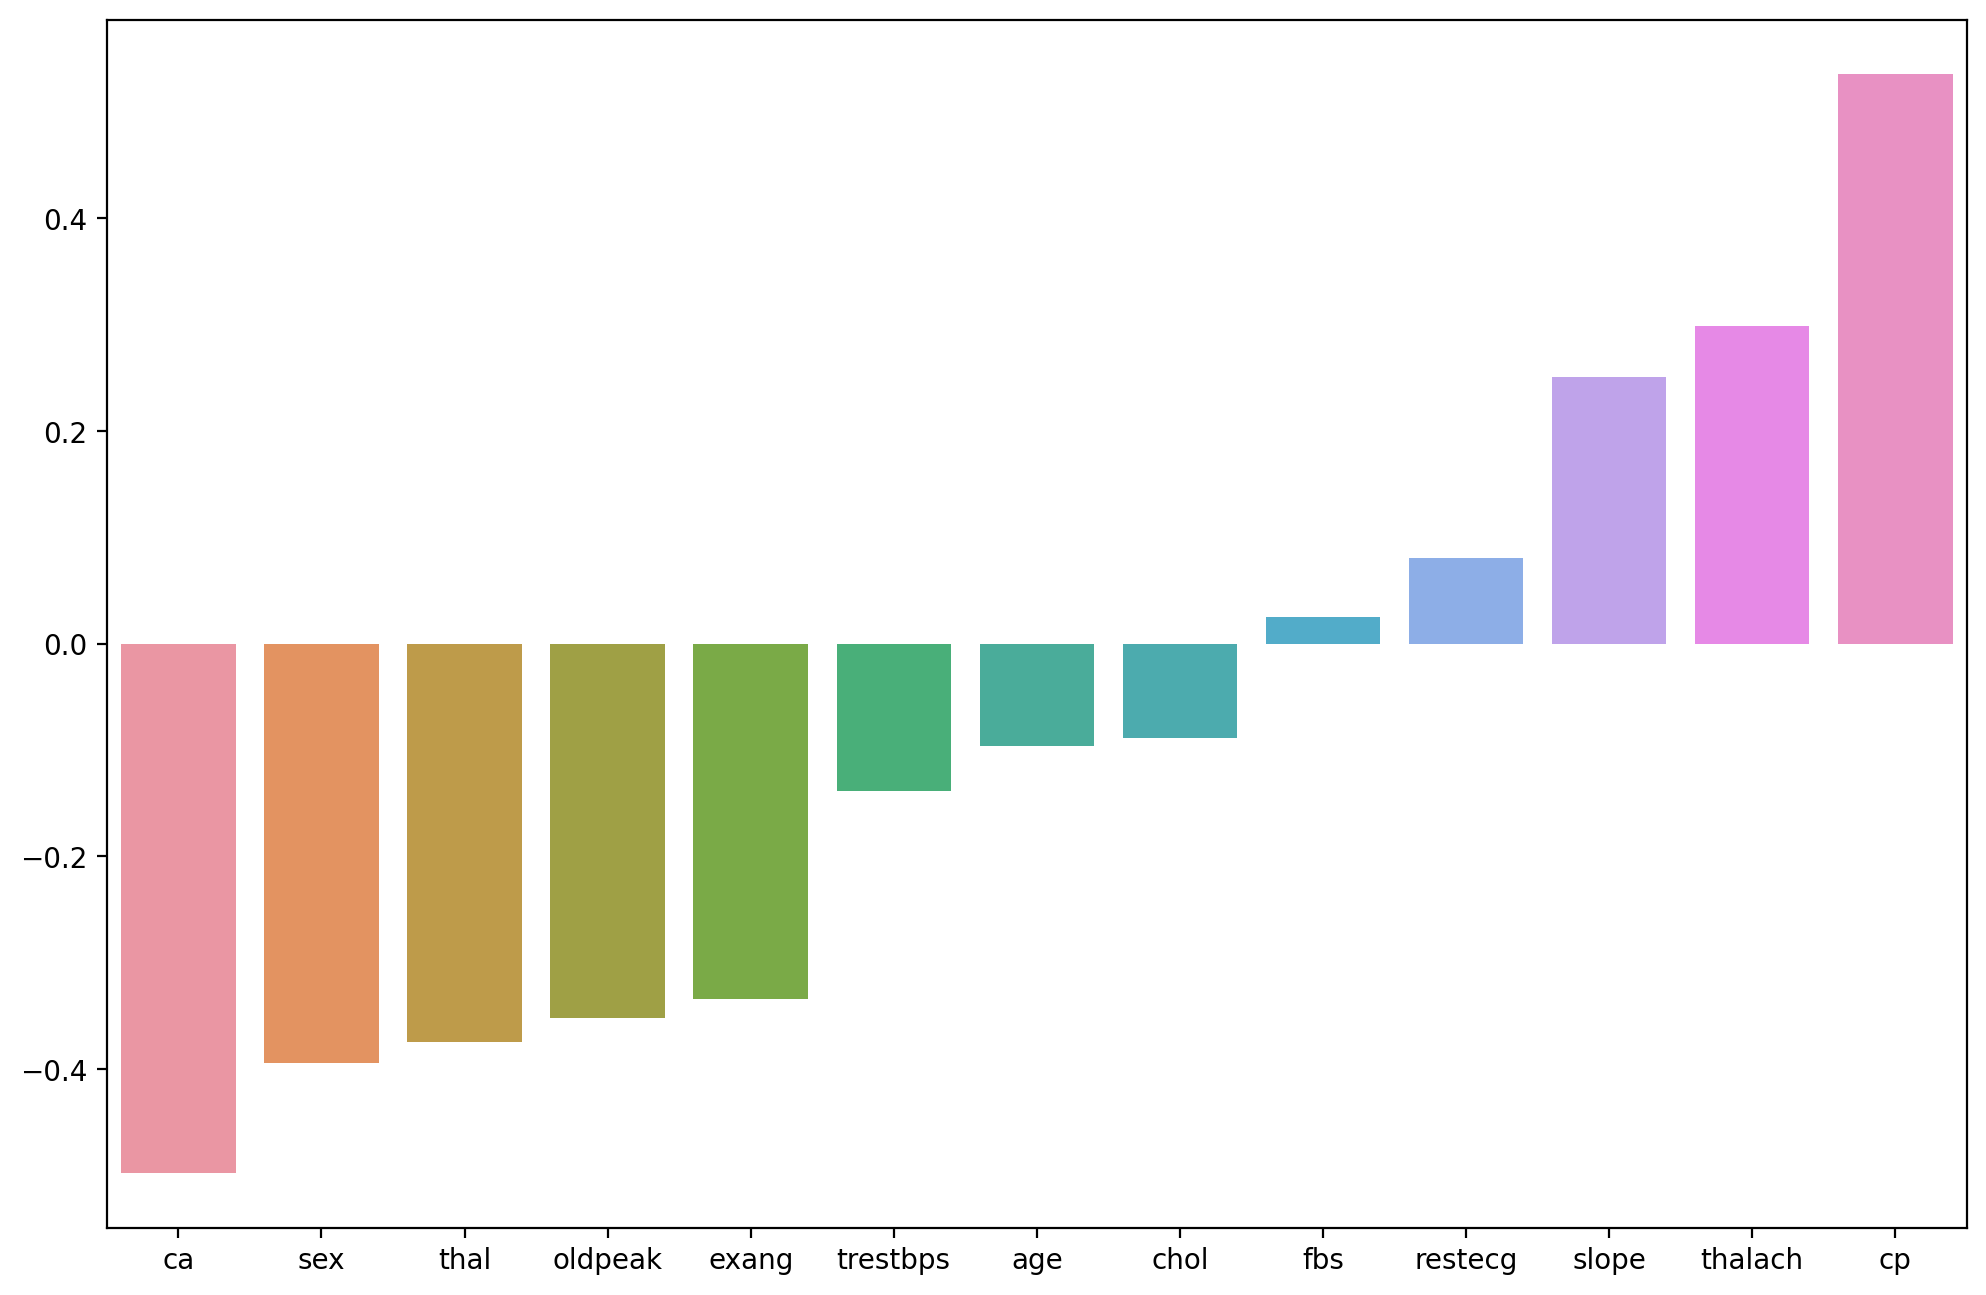

In [51]:
# 2st method
plt.figure(figsize=(12,8), dpi=200)
sns.barplot(x=coefs_2.index, y=coefs_2.values)

---------

## Model Performance Evaluation

**TASK: Let's now evaluate your model on the remaining 10% of the data, the test set.**

**TASK: Create the following evaluations:**
* Confusion Matrix Array
* Confusion Matrix Plot
* Classification Report

In [52]:
# model evaluation
y_pred = logit_model.predict(scaled_X_test)

In [53]:
y_pred

array([0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1,
       1, 1, 1, 1, 0, 1, 0, 0, 0], dtype=int64)

In [54]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report, accuracy_score

In [55]:
confusion_matrix(y_test, y_pred)

array([[11,  4],
       [ 1, 15]], dtype=int64)

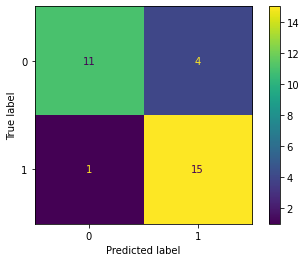

In [56]:
ConfusionMatrixDisplay.from_predictions(y_test, y_pred)

In [57]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.92      0.73      0.81        15
           1       0.79      0.94      0.86        16

    accuracy                           0.84        31
   macro avg       0.85      0.84      0.84        31
weighted avg       0.85      0.84      0.84        31



### Performance Curves

**TASK: Create both the precision recall curve and the ROC Curve.**

In [58]:
from sklearn.metrics import RocCurveDisplay, roc_curve, roc_auc_score, auc, plot_precision_recall_curve, PrecisionRecallDisplay

C:\Users\asus\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_precision_recall_curve is deprecated; Function `plot_precision_recall_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: PrecisionRecallDisplay.from_predictions or PrecisionRecallDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


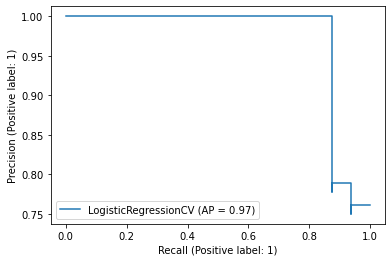

In [59]:
# method1
plot_precision_recall_curve(logit_model, scaled_X_test, y_test)

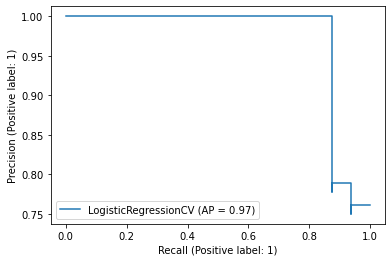

In [60]:
# method2
PrecisionRecallDisplay.from_estimator(logit_model, scaled_X_test, y_test)

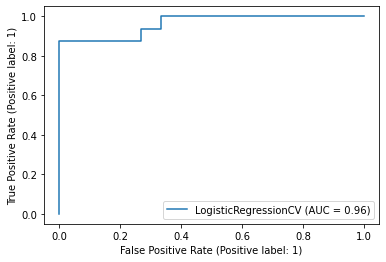

In [61]:
RocCurveDisplay.from_estimator(logit_model, scaled_X_test, y_test)

**Final Task: A patient with the following features has come into the medical office:**

    age          48.0
    sex           0.0
    cp            2.0
    trestbps    130.0
    chol        275.0
    fbs           0.0
    restecg       1.0
    thalach     139.0
    exang         0.0
    oldpeak       0.2
    slope         2.0
    ca            0.0
    thal          2.0

**TASK: What does your model predict for this patient? Do they have heart disease? How "sure" is your model of this prediction?**

*For convience, we created an array of the features for the patient above*

In [64]:
X.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal'],
      dtype='object')

In [81]:
X_test.iloc[-1]

age          54.0
sex           1.0
cp            0.0
trestbps    122.0
chol        286.0
fbs           0.0
restecg       0.0
thalach     116.0
exang         1.0
oldpeak       3.2
slope         1.0
ca            2.0
thal          2.0
Name: 268, dtype: float64

In [66]:
# try to predict the output
# mock some patient data
patient = [[ 54. ,   1. ,   0. , 122. , 286. ,   0. ,   0. , 116. ,   1. ,
          3.2,   1. ,   2. ,   2. ]]

patient2 = [[48., 0., 2., 130., 275., 0., 1., 139., 0., 0.2, 2., 0., 2.0]]

In [74]:
print(len(patient[0]))
print(len(patient2[0]))

13
13


In [82]:
# EXPECTED PREDICTION
y_test.iloc[-1]

0

In [83]:
logit_model.predict_proba(patient)

# prob 0 --> 0.9
# prob 1 --> 0.0000001

## output => 0

array([[9.99999862e-01, 1.38455917e-07]])

In [84]:
# EXPECTED PROBABILITY PER CLASS (Basically model should be extremely sure its in the 0 class)
logit_model.predict(patient)

array([0], dtype=int64)

In [85]:
logit_model.predict(patient2)

array([0], dtype=int64)

In [86]:
logit_model.predict_proba(patient2)

array([[0.98646, 0.01354]])

In [87]:
from sklearn.metrics import RocCurveDisplay, roc_curve, roc_auc_score, auc, plot_precision_recall_curve, PrecisionRecallDisplay

In [ ]:
from sklearn.metrics